In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
from pylab import rcParams
import warnings
warnings.filterwarnings('ignore')

from tqdm import tqdm, tqdm_notebook

In [2]:
df = pd.read_csv('data/air_pollution.csv', parse_dates=['date'])
df.set_index('date', inplace=True)
split = '2014-01-01'
train = df.loc[df.index<=split]
test = df.loc[df.index>split]
print('train: %i' %len(train))
print('test: %i' %len(test))

train: 1461
test: 364


In [3]:
def mape(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

from sklearn.metrics import mean_squared_error


def rmse(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.sqrt(mean_squared_error(y_true, y_pred))

In [4]:
# basic naive approach
mean = test.pollution_today.mean()
mean = np.array([mean for x in range(len(test))])

MAPE = {}
RMSE = {}
predictions = {}

MAPE['Naive mean'] = mape(test.pollution_today, mean)
RMSE['Naive mean'] = rmse(test.pollution_today, mean)
predictions['Naive mean'] = mean

MAPE['Yesetrday value'] = mape(test.pollution_today, test.pollution_yesterday)
RMSE['Yesetrday value'] = rmse(test.pollution_today, test.pollution_yesterday)
predictions['Yesterday value'] = test.pollution_yesterday.values

In [5]:
RMSE

{'Naive mean': 81.44435990224613, 'Yesetrday value': 74.52276372084813}

In [ ]:
# Simple Exponential Smoothing
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing

yhat = list()
for t in tqdm(range(len(test.pollution_today))):
    temp_train = df[:len(train)+t]
    model = SimpleExpSmoothing(temp_train.pollution_today)
    model_fit = model.fit()
    predictions = model_fit.predict(start=len(temp_train), end=len(temp_train))
    yhat = yhat + [predictions]

yhat = pd.concat(yhat)
MAPE['SES'] = mape(test.pollution_today, yhat.values)
RMSE['SES'] = rmse(test.pollution_today, yhat.values)
predictions['SES'] = yhat.values

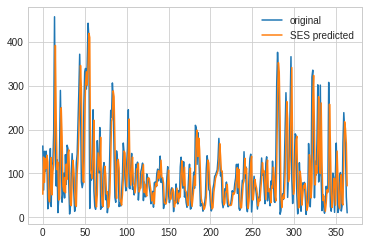

In [7]:
plt.plot(test.pollution_today.values, label='original')
plt.plot(yhat.values, label='SES predicted')
plt.legend(loc='best')

In [ ]:
# Triple Exponential Smoothing or Holt winters
yhat = list()
for t in tqdm(range(len(test.pollution_today))):
    temp_train = df[:len(train)+t]
    model = ExponentialSmoothing(temp_train.pollution_today)
    model_fit = model.fit()
    predictions = model_fit.predict(start=len(temp_train), end=len(temp_train))
    yhat = yhat+[predictions]

yhat = pd.concat(yhat)
MAPE['Holt Winters'] = mape(test.pollution_today, yhat.values)
RMSE['Holt Winters'] = rmse(test.pollution_today, yhat.values)
predictions['Holt Winters'] = yhat.values

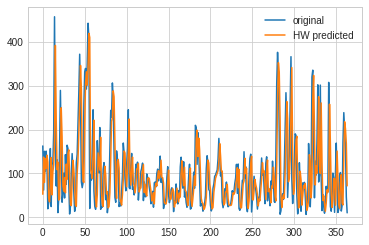

In [9]:
plt.plot(test.pollution_today.values, label='original')
plt.plot(yhat.values, label='HW predicted')
plt.legend(loc='best')

In [ ]:
# AR model
from statsmodels.tsa.ar_model import AR

yhat = list()
for t in tqdm(range(len(test.pollution_today))):
    temp_train = df[:len(train)+t]
    model = AR(temp_train.pollution_today)
    model_fit = model.fit()
    predictions = model_fit.predict(start=len(temp_train), end=len(temp_train), dynamic=False)
    yhat = yhat+[predictions]

yhat = pd.concat(yhat)
MAPE['AR'] = mape(test.pollution_today, yhat.values)
RMSE['AR'] = rmse(test.pollution_today, yhat.values)
predictions['AR'] = yhat.values

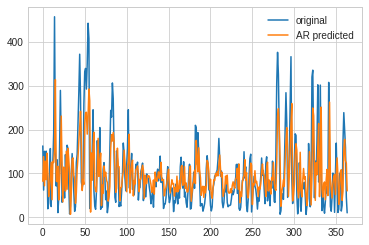

In [11]:
plt.plot(test.pollution_today.values, label='original')
plt.plot(yhat.values, label='AR predicted')
plt.legend(loc='best')

In [ ]:
# MA model
from statsmodels.tsa.arima_model import ARMA

yhat = list()
for t in tqdm(range(len(test.pollution_today))):
    temp_train = df[:len(train)+t]
    model = ARMA(temp_train.pollution_today, order=(0,1))
    model_fit = model.fit()
    predictions = model_fit.predict(start=len(temp_train), end=len(temp_train), dynamic=False)
    yhat = yhat+[predictions]

yhat = pd.concat(yhat)
MAPE['MA'] = mape(test.pollution_today, yhat.values)
RMSE['MA'] = rmse(test.pollution_today, yhat.values)
predictions['MA'] = yhat.values

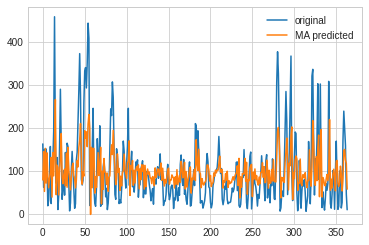

In [13]:
plt.plot(test.pollution_today.values, label='original')
plt.plot(yhat.values, label='MA predicted')
plt.legend(loc='best')

In [ ]:
# ARMA
from statsmodels.tsa.arima_model import ARMA

yhat = list()
for t in tqdm(range(len(test.pollution_today))):
    temp_train = df[:len(train)+t]
    model = ARMA(temp_train.pollution_today, order=(1,1))
    model_fit = model.fit()
    predictions = model_fit.predict(start=len(temp_train), end=len(temp_train), dynamic=False)
    yhat = yhat+[predictions]

yhat = pd.concat(yhat)
MAPE['ARMA'] = mape(test.pollution_today, yhat.values)
RMSE['ARMA'] = rmse(test.pollution_today, yhat.values)
predictions['ARMA'] = yhat.values

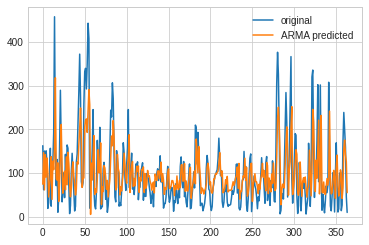

In [15]:
plt.plot(test.pollution_today.values, label='original')
plt.plot(yhat.values, label='ARMA predicted')
plt.legend(loc='best')

In [ ]:
# ARIMA
from statsmodels.tsa.arima_model import ARIMA

yhat = list()
for t in tqdm(range(len(test.pollution_today))):
    temp_train = df[:len(train)+t]
    model = ARIMA(temp_train.pollution_today, order=(1,0,1))
    model_fit = model.fit()
    predictions = model_fit.predict(start=len(temp_train), end=len(temp_train), dynamic=False)
    yhat = yhat+[predictions]

yhat = pd.concat(yhat)
MAPE['ARIMA'] = mape(test.pollution_today, yhat.values)
RMSE['ARIMA'] = rmse(test.pollution_today, yhat.values)
predictions['ARIMA'] = yhat.values

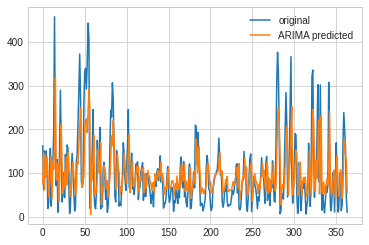

In [17]:
plt.plot(test.pollution_today.values, label='original')
plt.plot(yhat.values, label='ARIMA predicted')
plt.legend(loc='best')

In [ ]:
# autoARIMA
import pmdarima as pm

autoARIMA = pm.auto_arima(train.pollution_today, trace=True, error_action='ignore', supress_warnings=True, seasonal=False)
autoARIMA.fit(train.pollution_today)

In [ ]:
order = autoARIMA.order

yhat = list()
for t in tqdm(range(len(test.pollution_today))):
    temp_train = df[:len(train)+t]
    model = ARIMA(temp_train.pollution_today, order=order)
    model_fit = model.fit()
    predictions = model_fit.predict(start=len(temp_train), end=len(temp_train), dynamic=False)
    yhat = yhat+[predictions]

yhat = pd.concat(yhat)
MAPE['autoARIMA'] = mape(test.pollution_today, yhat.values)
RMSE['autoARIMA'] = rmse(test.pollution_today, yhat.values)
predictions['autoARIMA'] = yhat.values

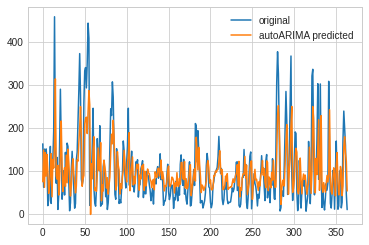

In [20]:
plt.plot(test.pollution_today.values, label='original')
plt.plot(yhat.values, label='autoARIMA predicted')
plt.legend(loc='best')

In [ ]:
# SARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX


yhat = list()
for t in tqdm(range(len(test.pollution_today))):
    temp_train = df[:len(train)+t]
    model = SARIMAX(temp_train.pollution_today, order=(1,0,0), seasonal_order=(1,0,0,4))
    model_fit = model.fit()
    predictions = model_fit.predict(start=len(temp_train), end=len(temp_train), dynamic=False)
    yhat = yhat+[predictions]

yhat = pd.concat(yhat)
MAPE['SARIMA'] = mape(test.pollution_today, yhat.values)
RMSE['SARIMA'] = rmse(test.pollution_today, yhat.values)
predictions['SARIMA'] = yhat.values

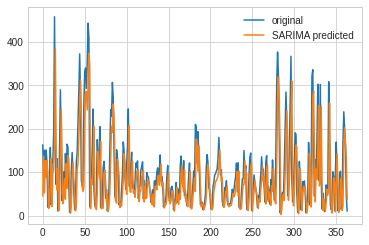

In [22]:
plt.plot(test.pollution_today.values, label='original')
plt.plot(yhat.values, label='SARIMA predicted')
plt.legend(loc='best')

In [ ]:
# auto-SARIMA
import pmdarima as pm

autoSARIMA = pm.auto_arima(train.pollution_today, trace=True, error_action='ignore', 
                          suppress_warnings=True, seasonal=True, m=5, stepwise=True)
autoSARIMA.fit(train.pollution_today)

In [ ]:
order = autoSARIMA.order
seasonal_order = autoSARIMA.seasonal_order

yhat = list()
for t in tqdm(range(len(test.pollution_today))):
    temp_train = df[:len(train)+t]
    model = SARIMAX(temp_train.pollution_today, order=order, seasonal_order=seasonal_order, initialization='approximate_diffuse')
    model_fit = model.fit()
    predictions = model_fit.predict(start=len(temp_train), end=len(temp_train), dynamic=False)
    yhat = yhat+[predictions]

yhat = pd.concat(yhat)
MAPE['autoSARIMA {0},{1}'.format(order, seasonal_order)] = mape(test.pollution_today, yhat.values)
RMSE['autoSARIMA {0},{1}'.format(order, seasonal_order)] = rmse(test.pollution_today, yhat.values)
predictions['autoSARIMA {0},{1}'.format(order, seasonal_order)] = yhat.values

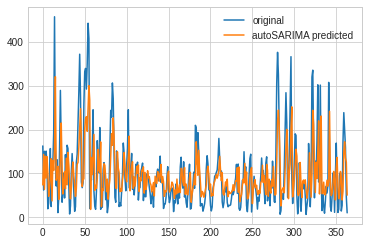

In [25]:
plt.plot(test.pollution_today.values, label='original')
plt.plot(yhat.values, label='autoSARIMA predicted')
plt.legend(loc='best')

In [26]:
# prophet
from fbprophet import Prophet

train_pr = train.rename(columns={'pollution_today':'y'})
train_pr['ds'] = train_pr.index
train_pr.index = pd.RangeIndex(len(train_pr.index))

test_pr = test.rename(columns={'pollution_today':'y'})
test_pr['ds'] = test_pr.index
test_pr.index = pd.RangeIndex(len(test_pr.index))

In [27]:
prophet = Prophet(growth='linear', seasonality_mode = 'multiplicative', 
                  holidays_prior_scale=20, daily_seasonality=False, 
                  weekly_seasonality = False, yearly_seasonality = False).add_seasonality(
                      name='monthly', period=30.5, fourier_order=55
                  ).add_seasonality(
                      name='daily', period=1, fourier_order=15
                  ).add_seasonality(
                      name='weekly', period=7, fourier_order=25
                  ).add_seasonality(
                      name='yearly', period=365.25/4, fourier_order=55
                  ).add_country_holidays(country_name='China')

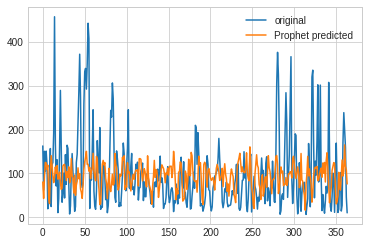

In [28]:
prophet.fit(train_pr)
yhat = prophet.predict(test_pr)
MAPE['Prophet'] = mape(test.pollution_today, yhat.yhat.values)
RMSE['Prophet'] = rmse(test.pollution_today, yhat.yhat.values)
predictions['Prophet'] = yhat.yhat.values

plt.plot(test.pollution_today.values, label='original')
plt.plot(yhat.yhat.values, label='Prophet predicted')
plt.legend(loc='best')

In [47]:
RMSE = pd.DataFrame(RMSE, index=[0])
RMSE = RMSE.T
RMSE.columns = ['RMSE']
RMSE = RMSE.sort_values(by=['RMSE'])
RMSE

,RMSE
autoARIMA,64.712253
"autoSARIMA (2, 0, 2),(1, 0, 1, 5)",64.771239
ARMA,64.861694
ARIMA,64.861694
AR,65.321718
MA,66.201675
SARIMA,71.325061
Yesetrday value,74.522764
SES,74.671731
Holt Winters,74.671731


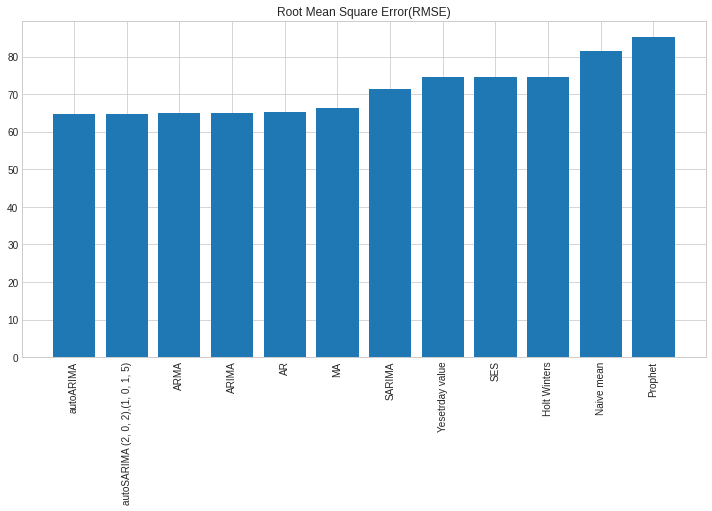

In [67]:
plt.figure(figsize=(10,7))
plt.bar(RMSE.index, RMSE.RMSE)
plt.xticks(rotation=90)
plt.tight_layout()
plt.title('Root Mean Square Error(RMSE)')
plt.show()

In [62]:
MAPE = pd.DataFrame(MAPE, index=[0])
MAPE = MAPE.T
MAPE.columns = ['MAPE']
MAPE = MAPE.sort_values(by=['MAPE'])
MAPE

,MAPE
SARIMA,90.600687
"autoSARIMA (2, 0, 2),(1, 0, 1, 5)",95.282644
autoARIMA,100.225573
ARMA,100.564460
ARIMA,100.564460
AR,101.559338
Yesetrday value,104.404971
MA,105.286912
SES,111.262657
Holt Winters,111.262657


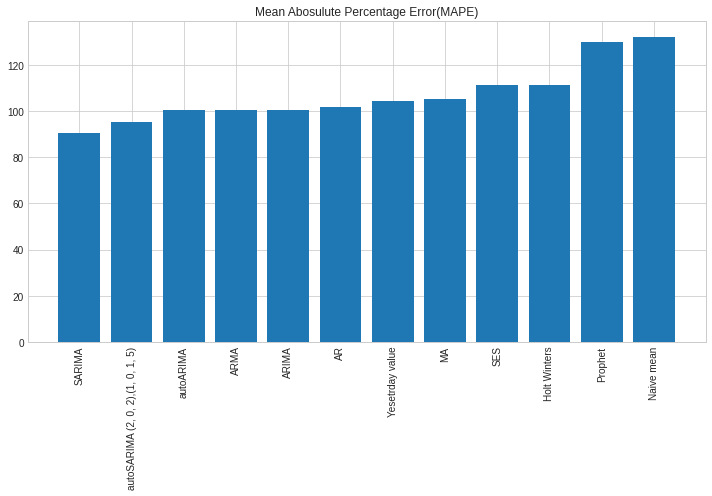

In [65]:
plt.figure(figsize=(10,7))
plt.bar(MAPE.index, MAPE.MAPE)
plt.xticks(rotation=90)
plt.title('Mean Abosulute Percentage Error(MAPE)')
plt.tight_layout()
plt.show()